# Projet Python 2 :
Origines et évolution des prénoms
en France

## read the data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import seaborn.objects as so
import numpy as np
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import plotly.express as px

%matplotlib inline
mpl.rcParams['figure.dpi']= 300

In [5]:
path = '/home/dmitrii.druzhbin@Digital-Grenoble.local/Documents/projet Prenomes/projet Prenomes/'

In [6]:
data_nat_raw = pd.read_csv(path + '/data/nat2022.csv',sep=';')

In [7]:
data_prenom_raw = pd.read_csv(path + '/data/Prenoms.csv',sep=';', encoding='latin-1')

In [8]:
data_prenom_raw.head()

01_prenom 02_genre        03_langage  04_fréquence
0   aaliyah        f  english (modern)           0.0
1    aapeli        m           finnish           0.0
2      aapo        m           finnish           0.0
3     aaren      m,f           english           0.0
4     aarne        m           finnish           0.0

In [9]:
data_prenom_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11627 entries, 0 to 11626
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   01_prenom     11626 non-null  object 
 1   02_genre      11627 non-null  object 
 2   03_langage    11196 non-null  object 
 3   04_fréquence  11627 non-null  float64
dtypes: float64(1), object(3)
memory usage: 363.5+ KB


In [10]:
data_nat_raw.head()

sexe        preusuel annais  nombre
0     1  _PRENOMS_RARES   1900    1249
1     1  _PRENOMS_RARES   1901    1342
2     1  _PRENOMS_RARES   1902    1330
3     1  _PRENOMS_RARES   1903    1286
4     1  _PRENOMS_RARES   1904    1430

In [11]:
data_nat_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703007 entries, 0 to 703006
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   sexe      703007 non-null  int64 
 1   preusuel  703005 non-null  object
 2   annais    703007 non-null  object
 3   nombre    703007 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 21.5+ MB


In [12]:
data_nat_raw.preusuel.isna().sum()

2

In [13]:
data_nat_nz = data_nat_raw.dropna() 

## la proportion?

In [15]:
data_nat_nz.sexe.value_counts()

sexe
2    381724
1    321281
Name: count, dtype: int64

#### what is 2 and 1?

In [17]:
data_nat_nz['preusuel'][data_nat_nz['sexe']==1].sort_values().head(10)

125        A
124        A
123        A
134    AADAM
128    AADAM
129    AADAM
130    AADAM
131    AADAM
132    AADAM
133    AADAM
Name: preusuel, dtype: object

##### AADAM seems to be a male name but we check
aadam is aversion of adam

In [19]:
data_prenom_raw['02_genre'][data_prenom_raw['01_prenom']=='adam']

74    m
Name: 02_genre, dtype: object

In [20]:
prop_femmes = len(data_nat_nz['sexe'][data_nat_nz['sexe']==2])/len(data_nat_nz['sexe']) * 100

In [21]:
prop_femmes_born = ((data_nat_nz['nombre'][data_nat_nz['sexe']==2].sum())/data_nat_nz['nombre'].sum()) * 100

In [22]:
print('Persantage of femmes names from 1900 to 2022: ', str(round(prop_femmes, 2))+'\n',
      'Persantage of nommes names from 1900 to 2022: ', 100 - round(prop_femmes, 2), sep='')

Persantage of femmes names from 1900 to 2022: 54.3
Persantage of nommes names from 1900 to 2022: 45.7


In [23]:
print('Persantage of femmes born from 1900 to 2022: ', str(round(prop_femmes_born, 2))+'\n',
      'Persantage of nommes born from 1900 to 2022: ', 100 - round(prop_femmes_born, 2), sep='')

Persantage of femmes born from 1900 to 2022: 49.6
Persantage of nommes born from 1900 to 2022: 50.4


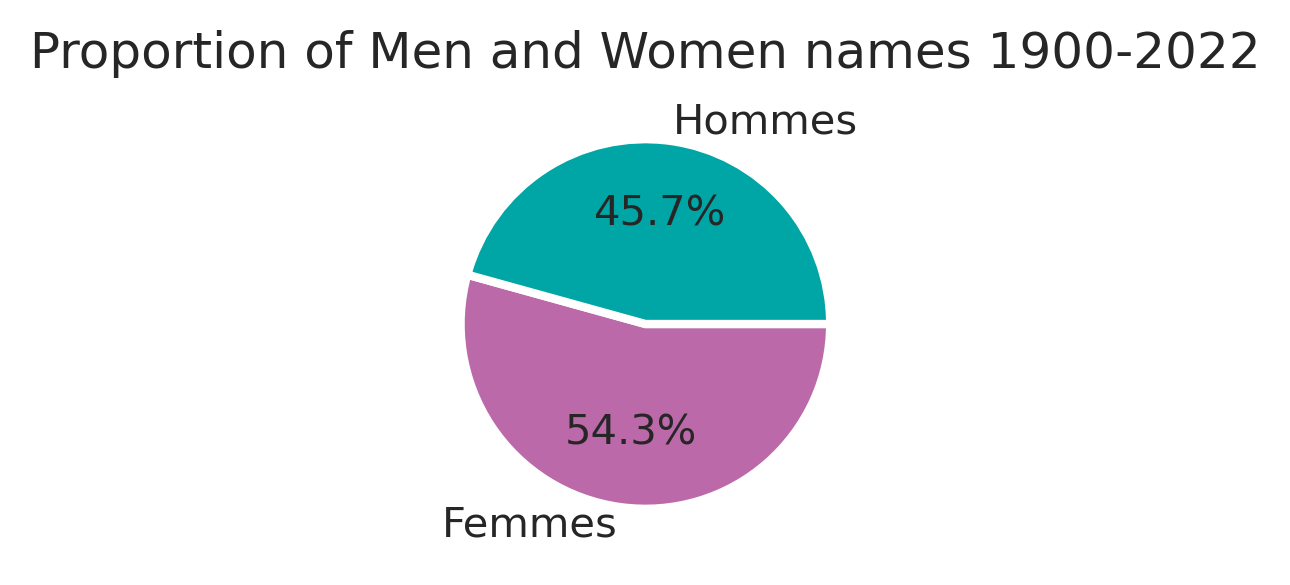

In [24]:
fig = plt.figure(figsize=[2,2])
sns.set_style("whitegrid")
plt.pie([round(prop_femmes, 2),100-round(prop_femmes, 2)],
        labels=['Femmes','Hommes'], 
        colors = ['#BC69AA','#00A6A6'], 
        counterclock=False, wedgeprops = {'linewidth': 2}, autopct='%1.1f%%')
plt.title('Proportion of Men and Women names 1900-2022')
plt.patches = []

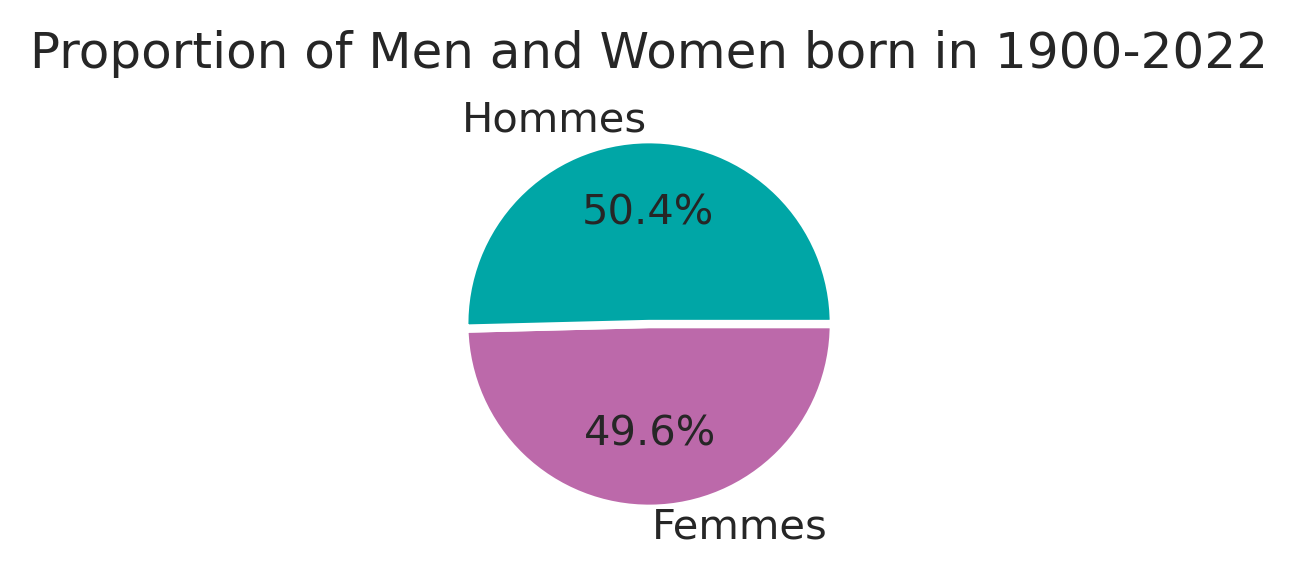

In [25]:
fig = plt.figure(figsize=[2,2])
sns.set_style("whitegrid")
plt.pie([round(prop_femmes_born, 2),100-round(prop_femmes_born, 2)],
        labels=['Femmes','Hommes'], 
        colors = ['#BC69AA','#00A6A6'], 
        counterclock=False, wedgeprops = {'linewidth': 2}, autopct='%1.1f%%')
plt.title('Proportion of Men and Women born in 1900-2022')
plt.patches = []

## Comment a-t-elle évolué au cours du temps ?

In [27]:
data_nat_nz['sexe'] = data_nat_nz['sexe'].map(lambda x: int(x))

/tmp/ipykernel_4925/1091823280.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nat_nz['sexe'] = data_nat_nz['sexe'].map(lambda x: int(x))


In [28]:
def remove_XXXX(year):
    if year == 'XXXX':
        year = np.nan
    else: year = year
    return year

In [29]:
data_nat_nz['annais'] = data_nat_nz['annais'].map(lambda x: remove_XXXX(x)) 

/tmp/ipykernel_4925/547602595.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_nat_nz['annais'] = data_nat_nz['annais'].map(lambda x: remove_XXXX(x))


In [30]:
data_nat_nz = data_nat_nz.dropna()

In [31]:
data_nat_nz['sex_str'] = data_nat_nz['sexe'].map(lambda x: str(x))

In [32]:
data_nat_nz['nombre'][0]

1249

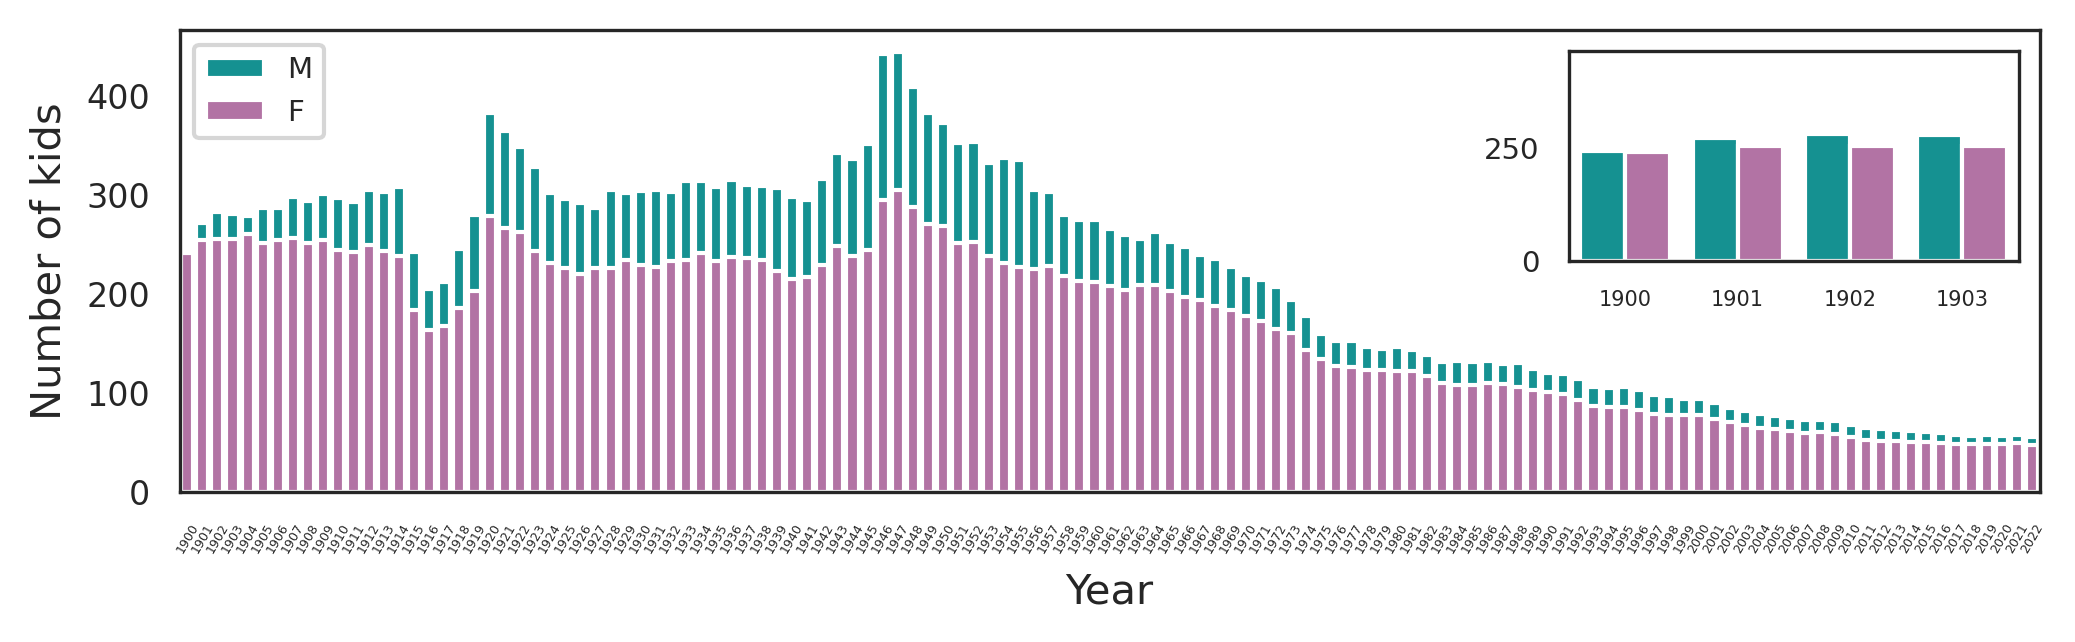

In [33]:


fig = plt.figure(figsize=[8,2])

sns.set_style('white')
sns.barplot(data_nat_nz, 
            x = 'annais', 
            y = 'nombre', 
            hue = 'sex_str', 
            errorbar=None,
            palette=['#00A6A6','#BC69AA'],
            dodge=False)
plt.yticks(fontsize = 8)
plt.ylabel('Number of kids')
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
plt.legend(['M','F'], loc = 'upper left',fontsize=7)

ax_inset = inset_axes(plt.gca(),
                      width = 1.5,
                      height = 0.7,
                      loc='upper right')

sns.barplot(data_nat_nz.sort_values(by = 'annais'), 
            x = data_nat_nz['annais'], 
            y = 'nombre', 
            hue = 'sex_str',
            hue_order=['1','2'],
            errorbar=None,
            palette=['#00A6A6','#BC69AA'],
            dodge=True, ax= ax_inset)

ax_inset.set_ylabel('')
ax_inset.set_xlabel('')
ax_inset.legend().remove()
ax_inset.set(alpha=0.5)

plt.xticks(fontsize = 5, rotation=0)
plt.xlim(-0.5,3.5)
plt.yticks(fontsize = 7)


plt.patches = []
# plt.tight_layout()

## l’article du Figaro

### Evolution du prénom Marie dans le temps (nbre de naissances de Marie par an) ?

In [36]:
#proportion of Marie for all period 1900 - 2022

data_nat_nz['nombre'][data_nat_nz['preusuel']=='MARIE'].sum() / data_nat_nz['nombre'].sum() * 100

2.588834977956348

In [113]:
def count_name_year(name, year):
    """returns proportion of a name in year"""
    return data_nat_nz['nombre'][(data_nat_nz['preusuel']==name)&(data_nat_nz['annais']==year)].sum() / data_nat_nz['nombre'][data_nat_nz['annais']==year].sum() * 100

In [38]:
prop_MARIE = [count_name_year('MARIE',str(year)) for year in range(1900,2023)]

In [39]:
prop_MARIE_df = pd.DataFrame()
prop_MARIE_df['proportion'] = prop_MARIE

prop_MARIE_df['year'] = range(1900,2023)

len(prop_MARIE_df)

123

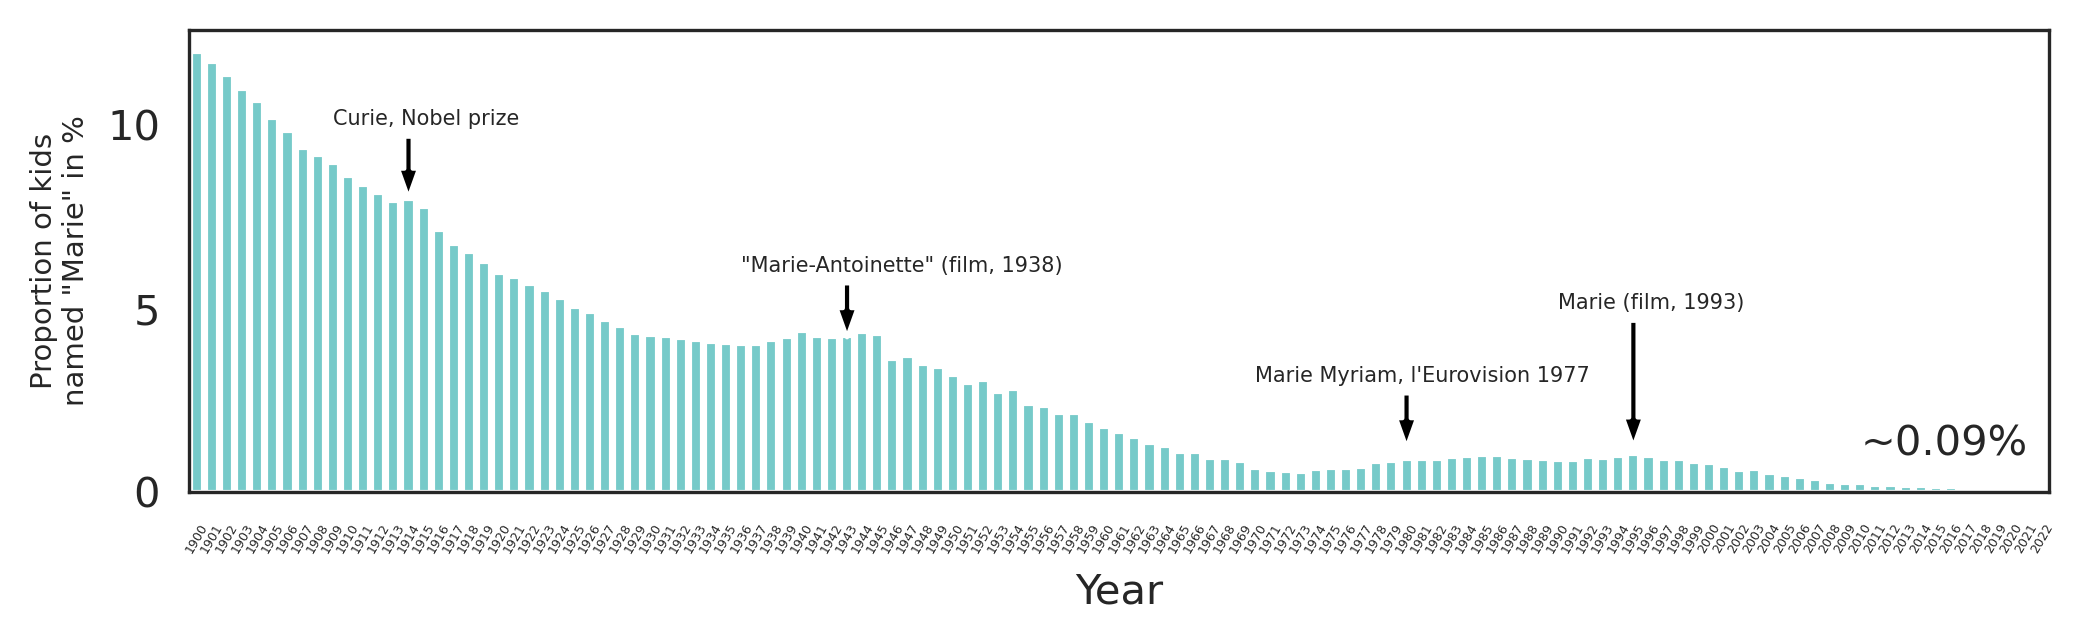

In [40]:
fig = plt.figure(figsize=[8,2])

ax = sns.barplot(data = prop_MARIE_df,
            x= 'year',
            y= 'proportion',
            color='#68D8D6')

plt.ylabel('Proportion of kids\nnamed "Marie" in %',fontsize=7)
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')

ax.text(110, 1, '~'+str(round(prop_MARIE_df['proportion'][120],2))+'%')
ax.text(9, 10, 'Curie, Nobel prize',fontsize = 5)
ax.annotate('',
                xy=(14, 8), xytext= (14, 9.7),
                xycoords='data',
                arrowprops=dict(facecolor='black',
                                width=2.0,
                                headwidth=5.0,
                                headlength=7.0,
                                shrink=0.01))


ax.text(36, 6, '"Marie-Antoinette" (film, 1938)',fontsize = 5)

ax.annotate('',
                xy=(43, 4.2), xytext= (43, 5.7),
                xycoords='data',
                arrowprops=dict(facecolor='black',
                                width=2.0,
                                headwidth=5.0,
                                headlength=7.0,
                                shrink=0.01))

ax.text(70, 3, "Marie Myriam, l'Eurovision 1977",fontsize = 5)

ax.annotate('',
                xy=(80, 1.2), xytext= (80, 2.7),
                xycoords='data',
                arrowprops=dict(facecolor='black',
                                width=2.0,
                                headwidth=5.0,
                                headlength=7.0,
                                shrink=0.01))

ax.text(90, 5, "Marie (film, 1993)",fontsize = 5)

ax.annotate('',
                xy=(95, 1.2), xytext= (95, 4.7),
                xycoords='data',
                arrowprops=dict(facecolor='black',
                                width=2.0,
                                headwidth=5.0,
                                headlength=7.0,
                                shrink=0.01))


plt.patches = []

In [41]:
def count_name_year_boys(name, year):
    return data_nat_nz['nombre'][(data_nat_nz['preusuel']==name)&(data_nat_nz['annais']==year)&(data_nat_nz['sexe']==1)].sum() / data_nat_nz['nombre'][(data_nat_nz['annais']==year)&(data_nat_nz['sexe']==1)].sum() * 100

In [42]:
prop_MARIE_boys = [count_name_year_boys('MARIE',str(year)) for year in range(1900,2023)]

In [43]:
prop_MARIE_df['%_boys'] = prop_MARIE_boys

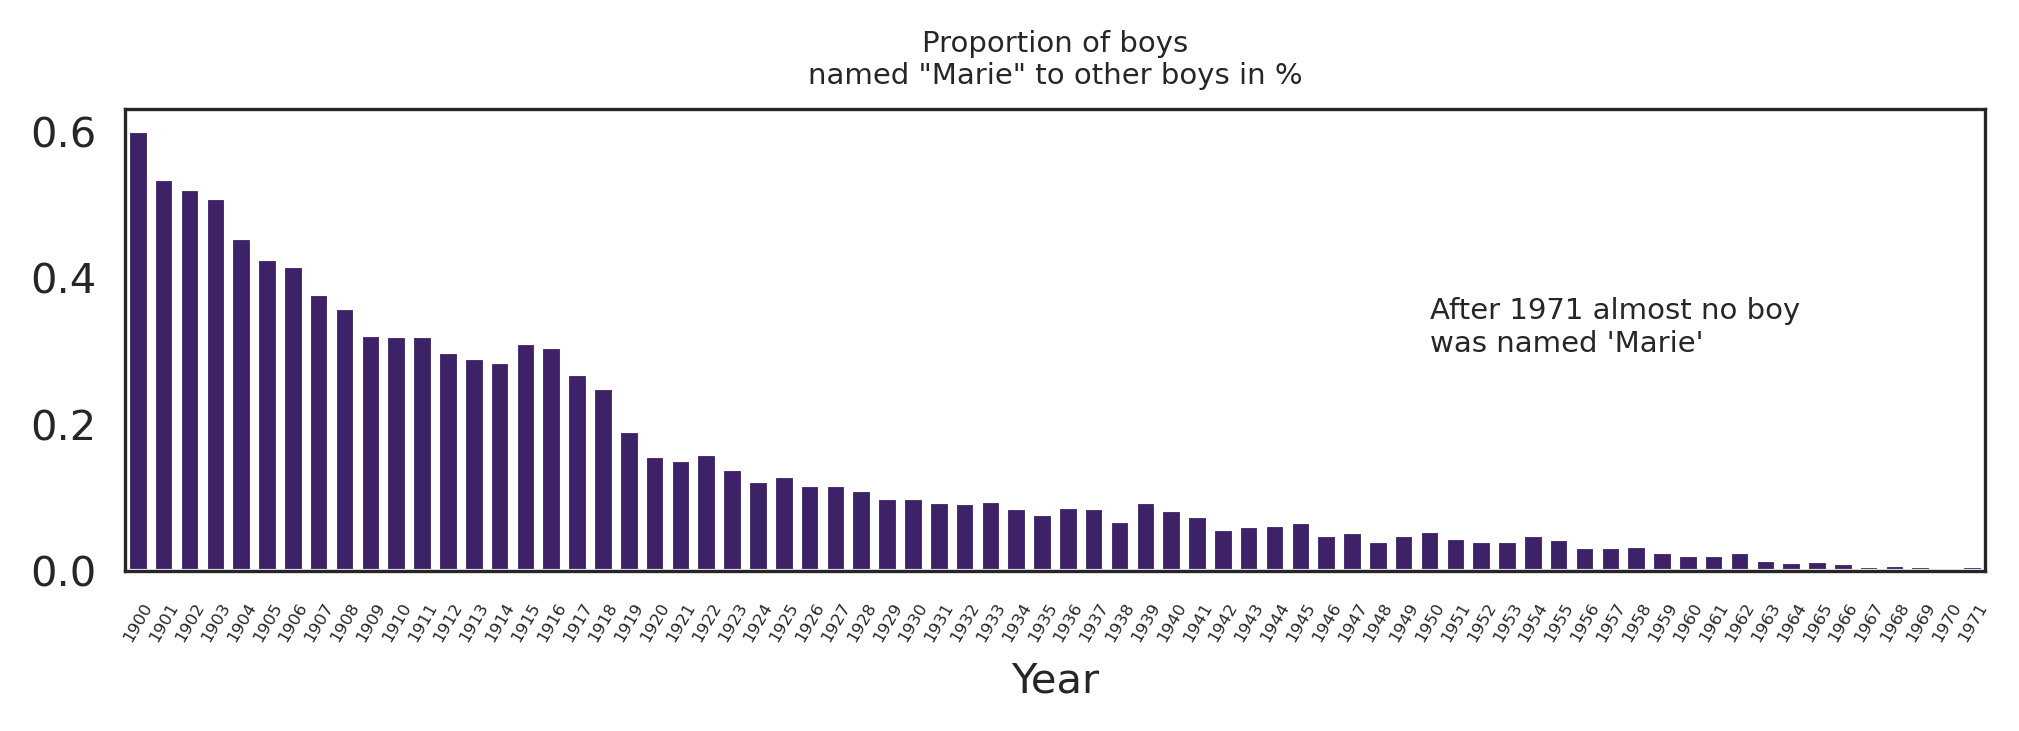

In [44]:
fig = plt.figure(figsize=[8,2])

ax = sns.barplot(data = prop_MARIE_df,
            x= 'year',
            y= '%_boys',
            color='#3A1772')

plt.ylabel('')
plt.xticks(fontsize = 4, rotation=60)
plt.xlabel('Year')
plt.xlim(-0.5, 71.5)
plt.title('Proportion of boys\nnamed "Marie" to other boys in %',fontsize=7)

ax.text(50, 0.3, "After 1971 almost no boy\nwas named 'Marie'",fontsize = 7)

plt.patches = []

In [45]:
def count_name_year_boys_to_girls(name, year):
    return data_nat_nz['nombre'][(data_nat_nz['preusuel']==name)&(data_nat_nz['annais']==year)&(data_nat_nz['sexe']==1)].sum() / data_nat_nz['nombre'][(data_nat_nz['preusuel']==name)&(data_nat_nz['annais']==year)&(data_nat_nz['sexe']==2)].sum() * 100

In [46]:
prop_MARIE_boys_to_girls = [count_name_year_boys_to_girls('MARIE',str(year)) for year in range(1900,2023)]

In [47]:
prop_MARIE_df['%_boys_to_girls'] = prop_MARIE_boys_to_girls

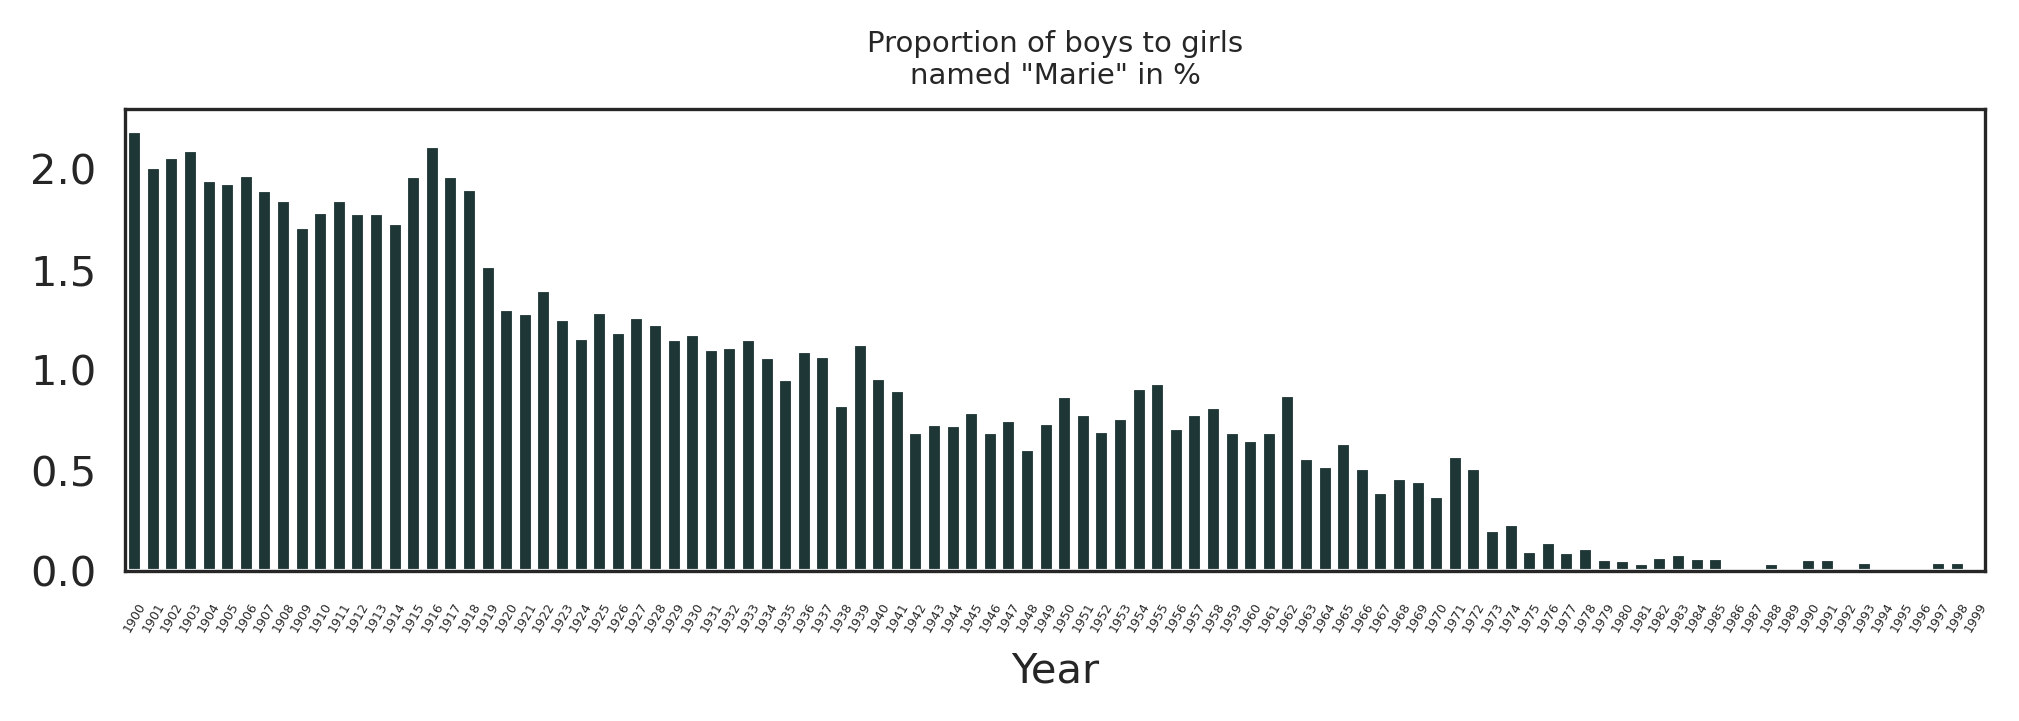

In [48]:
fig = plt.figure(figsize=[8,2])

ax = sns.barplot(data = prop_MARIE_df,
            x= 'year',
            y= '%_boys_to_girls',
            color='#1A3A3A')

plt.ylabel('')
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
plt.xlim(-0.5, 99.5)
plt.title('Proportion of boys to girls\nnamed "Marie" in %',fontsize=7)

# ax.text(50, 0.3, "After 1971 no boy\nwas named 'Marie'",fontsize = 7)

plt.patches = []

## prénoms différents

In [50]:
len(data_nat_nz['preusuel'][data_nat_nz['annais']=='1900'].value_counts())

1595

In [51]:
def prenom_divers_count(year):
    return (len(data_nat_nz['preusuel'][data_nat_nz['annais']==str(year)].value_counts()))

In [52]:
def prenom_divers_count_sex(year, sex = 1):
    return (len(data_nat_nz['preusuel'][(data_nat_nz['annais']==str(year))&(data_nat_nz['sexe']==sex)].value_counts()))

In [53]:
divers_count = [prenom_divers_count(year) for year in range(1900,2023)]

In [54]:
divers_count_boys = [prenom_divers_count_sex(year) for year in range(1900,2023)]

In [55]:
divers_count_girls = [prenom_divers_count_sex(year, 2) for year in range(1900,2023)]

In [56]:
divers_df = pd.DataFrame()

In [57]:
divers_df['prenom_different'] = divers_count
divers_df['year'] = range(1900,2023)
divers_df['prenom_different_boys'] = divers_count_boys
divers_df['prenom_different_girls'] = divers_count_girls

In [58]:
divers_df.sort_values(by = 'prenom_different', ascending = False).head(5)

prenom_different  year  prenom_different_boys  prenom_different_girls
114             13969  2014                   6674                    7749
112             13816  2012                   6585                    7689
115             13803  2015                   6649                    7567
117             13783  2017                   6668                    7545
113             13779  2013                   6585                    7646

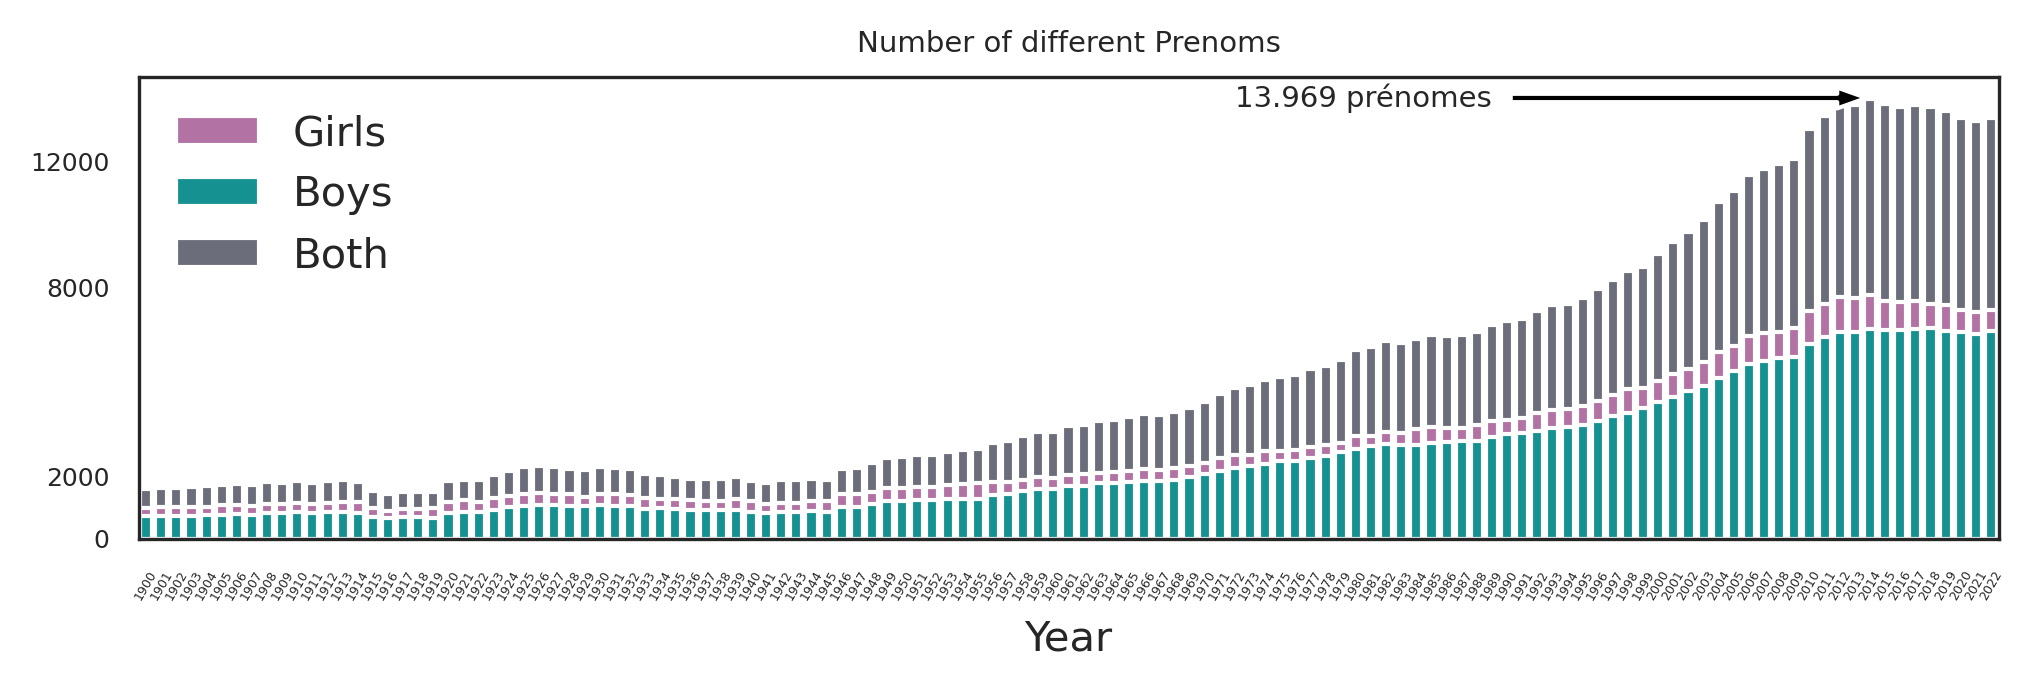

In [59]:
fig = plt.figure(figsize=[8,2])

ax = sns.barplot(data = divers_df,
            x= 'year',
            y= 'prenom_different',
            color='#696D7D')

sns.barplot(data = divers_df,
            x= 'year',
            y= 'prenom_different_girls',
            color='#BC69AA',
            ax = ax)

sns.barplot(data = divers_df,
            x= 'year',
            y= 'prenom_different_boys',
            color='#00A6A6',
            ax = ax)


plt.ylabel('')
# ax.set_yscale('log')
ax.set_yticks([0,2000,8000,12000])
plt.yticks(fontsize= 6)
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
# plt.xlim(-0.5, 99.5)
plt.title('Number of different Prenoms',fontsize=7)

take = plt.gca().get_children()
plt.legend([take[300],take[600],take[0]],['Girls', 'Boys', 'Both'],frameon=False)

ax.text(72, 13700, "13.969 prénomes",fontsize = 7)
ax.annotate('',
                xy=(114, 14000), xytext= (90, 14000),
                xycoords='data',
                arrowprops=dict(facecolor='black',
                                width=2.0,
                                headwidth=5.0,
                                headlength=7.0,
                                shrink=0.01))


# ax.text(50, 0.3, "",fontsize = 7)

plt.patches = []

## «prénoms rares»

In [61]:
df_prenom_rare = data_nat_nz[data_nat_nz['preusuel'].eq('_PRENOMS_RARES')].filter(['nombre','annais'],axis = 1).groupby('annais').sum().reset_index()
df_prenom_rare = df_prenom_rare.rename(columns = {'nombre': 'rare'})

In [62]:
df_prenom_rare.head(3)

annais  rare
0   1900  2976
1   1901  3116
2   1902  3076

In [63]:
df_prenom_rare['Gabriel'] = data_nat_nz[data_nat_nz['preusuel'].eq('GABRIEL')].filter(['nombre','annais'],axis = 1).groupby('annais').sum().reset_index().drop('annais',axis = 1)

In [64]:
df_prenom_rare['Marie'] = data_nat_nz[data_nat_nz['preusuel'].eq('MARIE')].filter(['nombre','annais'],axis = 1).groupby('annais').sum().reset_index().drop('annais',axis = 1)

In [65]:
df_prenom_rare.head(3)

annais  rare  Gabriel  Marie
0   1900  2976     1302  49778
1   1901  3116     1479  53198
2   1902  3076     1660  52923

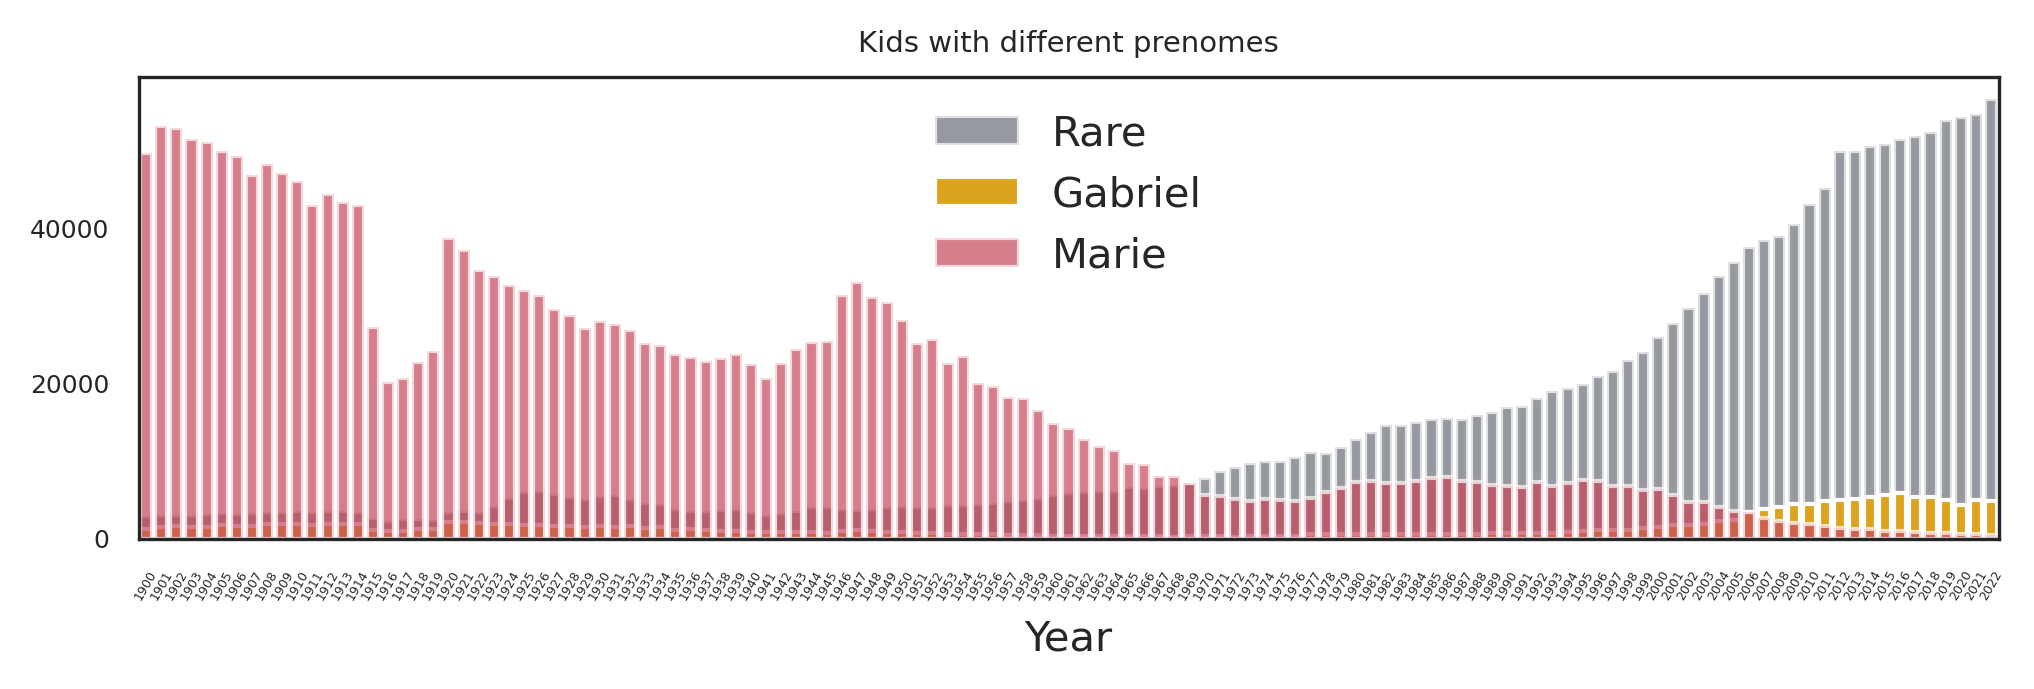

In [66]:
fig = plt.figure(figsize=[8,2])

ax = sns.barplot(data = df_prenom_rare,
            x= 'annais',
            y= 'rare',
            color='#696D7D', errorbar=None)

sns.barplot(data = df_prenom_rare,
            x= 'annais',
            y= 'Gabriel',
            color='#FBAF00',
            errorbar=None, 
            ax = ax)

sns.barplot(data = df_prenom_rare,
            x= 'annais',
            y= 'Marie',
            color='#DB324D',
            errorbar=None, 
            ax = ax)

plt.ylabel('')
# ax.set_yscale('log')
# ax.set_yticks([0,2000,8000,12000])
plt.yticks(fontsize= 6)
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
# plt.xlim(-0.5, 99.5)
plt.title('Kids with different prenomes',fontsize=7)

for bar in ax.containers[2]:
    bar.set_alpha(0.7)
    
for bar in ax.containers[0]:
    bar.set_alpha(0.7)

chld = plt.gca().get_children()
plt.legend([chld[0],chld[220],chld[300]],['Rare', 'Gabriel','Marie'],frameon=False)

# ax.text(50, 0.3, "",fontsize = 7)

plt.patches = []

## what name was popular each year:

In [68]:
data_uniform = data_nat_nz.copy()

data_uniform['preusuel'] = data_uniform['preusuel'].str.lower()

In [69]:
data_norare = data_uniform[data_uniform.preusuel.ne('_prenoms_rares')]

In [70]:
data_rare = data_uniform[data_uniform.preusuel.eq('_prenoms_rares')]

In [71]:
data_norare_boys = data_norare[data_norare['sexe'].eq(1)]
data_rare_boys = data_rare[data_rare['sexe'].eq(1)]

In [72]:
data_norare_boys = data_norare_boys.filter(['preusuel','annais','nombre'],axis = 1)
data_rare_boys = data_rare_boys.filter(['preusuel','annais','nombre'],axis = 1)

In [73]:
test = data_norare_boys.groupby(['annais','preusuel']).agg({'nombre': 'sum'})
test_rare = data_rare_boys.groupby(['annais','preusuel']).agg({'nombre': 'sum'})

In [74]:
test.xs('1900').sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,1]

14097

In [75]:
test.xs('1900').reset_index().max().iloc[1]

14097

In [76]:
test.xs('1990').reset_index().sum().iloc[1]

393218

In [77]:
(test.xs('1990').reset_index().max().iloc[1] / test.xs('1990').reset_index().sum().iloc[1]) * 100

2.9004267352969597

In [78]:
popname_boys = pd.DataFrame()
rarename_boys = pd.DataFrame()

In [79]:
popname_boys['year'] = range(1900,2023)
rarename_boys['year'] = range(1900,2023)

In [80]:
popname_boys['name'] = [test.xs(str(year)).sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,0] for year in range(1900,2023)]

In [81]:
popname_boys['count'] = [test.xs(str(year)).sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,1] for year in range(1900,2023)]
rarename_boys['count'] = [test_rare.xs(str(year)).sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,1] for year in range(1900,2023)]

In [82]:
popname_boys['proportion'] = [(test.xs(str(year)).reset_index().max().iloc[1] / test.xs(str(year)).reset_index().sum().iloc[1]) * 100 for year in range(1900,2023)]
rarename_boys['proportion'] = [(test_rare.xs(str(year)).reset_index().max().iloc[1]/(test.xs(str(year)).reset_index().sum().iloc[1] +
                                                                                       test_rare.xs(str(year)).reset_index().sum().iloc[1])) * 100 for year in range(1900,2023)]

In [83]:
len(popname_boys['name'].value_counts())

15

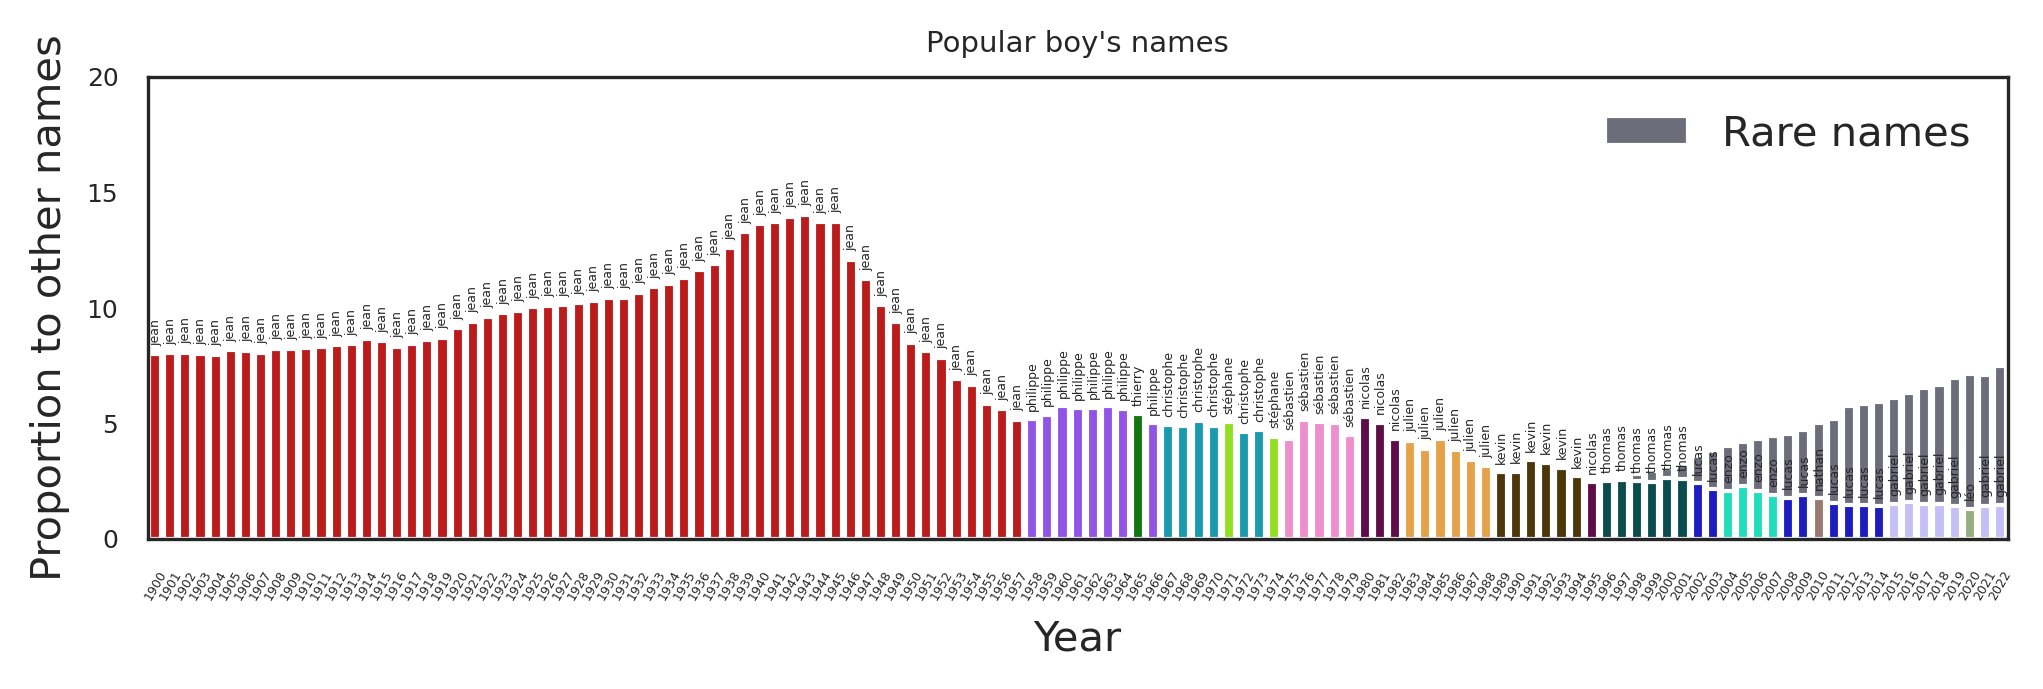

In [84]:
import colorcet as cc

fig = plt.figure(figsize=[8,2])

palette = sns.color_palette(cc.glasbey, n_colors=15)

ax = sns.barplot(data = rarename_boys,
            x= 'year',
            y= 'proportion',
            errorbar=None, color = '#696D7D')

sns.barplot(data = popname_boys,
            x= 'year',
            y= 'proportion',
            errorbar=None, hue = 'name', dodge=False, palette=palette, ax = ax)





plt.ylabel('')
plt.ylim(0,20)
# ax.set_yscale('log')
# ax.set_yticks([0,2000,8000,12000])
plt.yticks(fontsize= 6)
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
plt.ylabel('Proportion to other names')
# plt.xlim(-0.5, 99.5)
plt.title("Popular boy's names",fontsize=7)

for index, row in popname_boys.iterrows():
    ax.text(index-0.4, row.iloc[3]+0.5, row.iloc[1], fontsize = 3, rotation = 90)
    

# for bar in ax.containers[2]:
#     bar.set_alpha(0.7)
    
# for bar in ax.containers[0]:
#     bar.set_alpha(0.7)

chld = plt.gca().get_children()

plt.legend().remove()
plt.legend([chld[0]],['Rare names'],frameon=False)

plt.patches = []

In [85]:
data_norare_girls = data_norare[data_norare['sexe'].eq(2)]
data_rare_girls = data_rare[data_rare['sexe'].eq(2)]

In [86]:
data_norare_girls = data_norare_girls.filter(['preusuel','annais','nombre'],axis = 1)
data_rare_girls = data_rare_girls.filter(['preusuel','annais','nombre'],axis = 1)

In [87]:
test_girls = data_norare_girls.groupby(['annais','preusuel']).agg({'nombre': 'sum'})
test_rare_girls = data_rare_girls.groupby(['annais','preusuel']).agg({'nombre': 'sum'})

In [88]:
popname_girls = pd.DataFrame()
rarename_girls = pd.DataFrame()

popname_girls['year'] = range(1900,2023)
rarename_girls['year'] = popname_girls['year'].copy()

popname_girls['name'] = [test_girls.xs(str(year)).sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,0] for year in range(1900,2023)]



popname_girls['count'] = [test_girls.xs(str(year)).sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,1] for year in range(1900,2023)]
rarename_girls['count'] = [test_rare_girls.xs(str(year)).sort_values(by = 'nombre', ascending = False).reset_index().iloc[0,1] for year in range(1900,2023)]

In [89]:
popname_girls['proportion'] = [(test_girls.xs(str(year)).reset_index().max().iloc[1] / test_girls.xs(str(year)).reset_index().sum().iloc[1]) * 100 for year in range(1900,2023)]
rarename_girls['proportion'] = [(test_rare_girls.xs(str(year)).reset_index().max().iloc[1] / (test_rare_girls.xs(str(year)).reset_index().sum().iloc[1] + test_girls.xs(str(year)).reset_index().sum().iloc[1])) * 100 for year in range(1900,2023)]

In [90]:
popname_girls.head()

year   name  count  proportion
0  1900  marie  48713   20.647576
1  1901  marie  52150   20.393559
2  1902  marie  51857   19.968886
3  1903  marie  50424   19.417222
4  1904  marie  50131   19.060492

In [91]:
rarename_girls.head()

year  count  proportion
0  1900   1727    0.726690
1  1901   1774    0.688953
2  1902   1746    0.667852
3  1903   1763    0.674316
4  1904   1812    0.684233

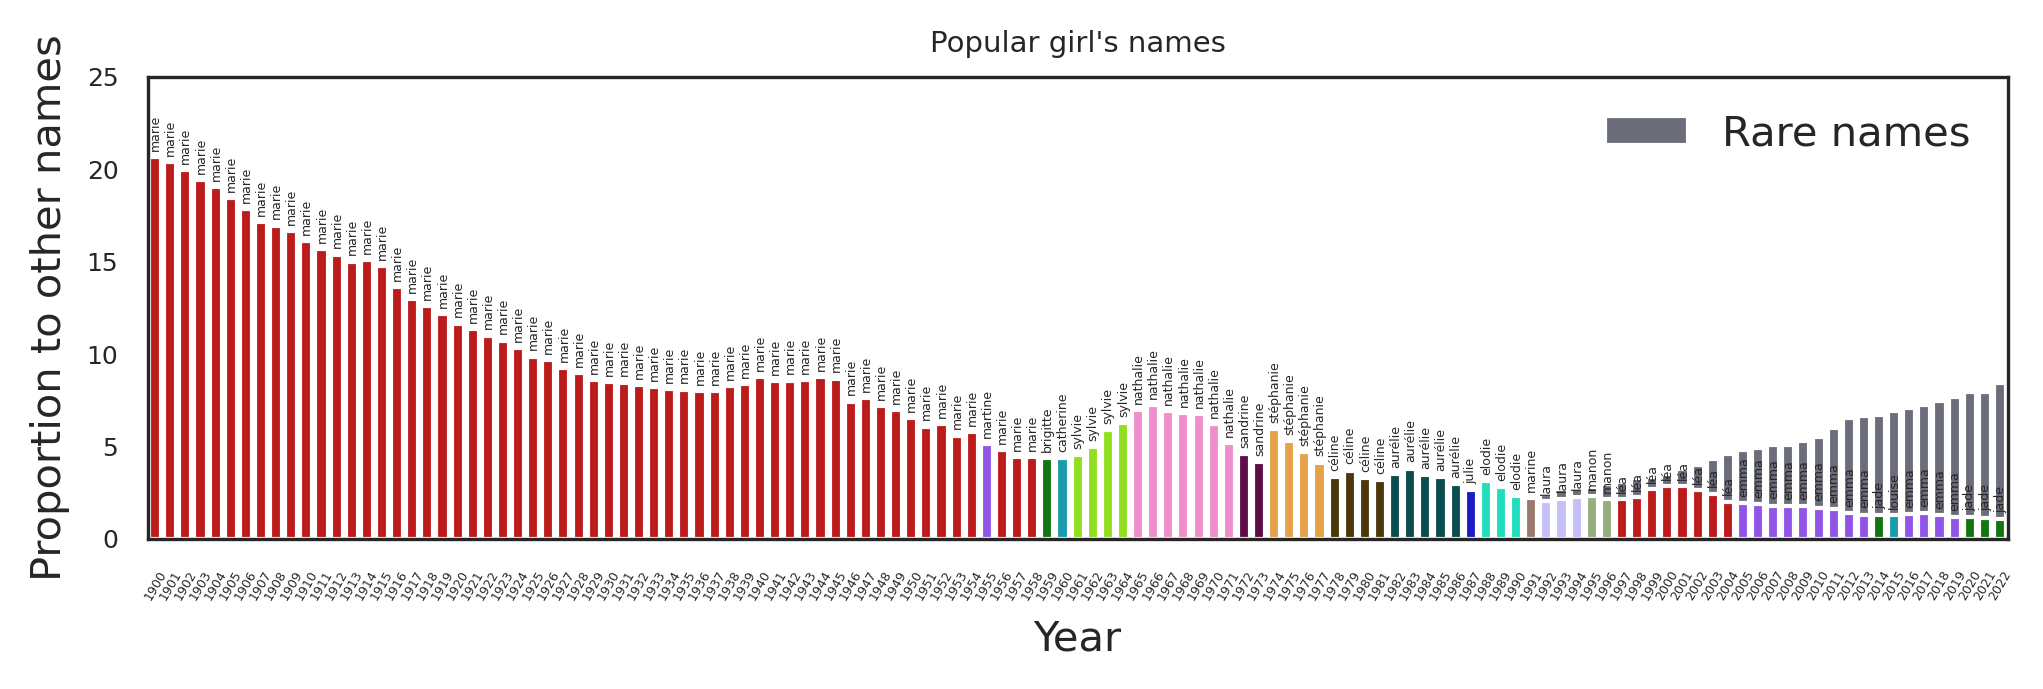

In [92]:
fig = plt.figure(figsize=[8,2])

palette = sns.color_palette(cc.glasbey, n_colors=15)

ax = sns.barplot(data = rarename_girls,
            x= 'year',
            y= 'proportion',
            errorbar=None, color = '#696D7D')

sns.barplot(data = popname_girls,
            x= 'year',
            y= 'proportion',
            errorbar=None, hue = 'name', dodge=False, palette=palette, ax = ax)

plt.ylabel('')
plt.ylim(0,25)
# ax.set_yscale('log')
# ax.set_yticks([0,2000,8000,12000])
plt.yticks(fontsize= 6)
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
plt.ylabel('Proportion to other names')
# plt.xlim(-0.5, 99.5)
plt.title("Popular girl's names",fontsize=7)

for index, row in popname_girls.iterrows():
    ax.text(index-0.4, row.iloc[3]+0.5, row.iloc[1], fontsize = 3, rotation = 90)
    

# for bar in ax.containers[2]:
#     bar.set_alpha(0.7)
    
# for bar in ax.containers[0]:
#     bar.set_alpha(0.7)

# chld = plt.gca().get_children()
chld = plt.gca().get_children()

plt.legend().remove()
plt.legend([chld[0]],['Rare names'],frameon=False)

plt.patches = []

In [93]:
data_norare = data_norare.drop('sex_str',axis = 1)

In [94]:
# import re
data_norare['double'] = (data_norare['preusuel'].str.contains(r'\bmarie-\w+\b')|data_norare['preusuel'].str.contains(r'\b\w+-marie\b'))

In [95]:
data_norare[data_norare.double.eq(True)].groupby(['annais','preusuel']).agg({'nombre': 'sum'}).xs('1900').sum()

nombre    2459
dtype: int64

In [96]:
double_names = pd.DataFrame()
double_names['year'] = range(1900,2023)
double_names['count'] = [data_norare[data_norare.double.eq(True)].groupby(['annais','preusuel']).agg({'nombre': 'sum'}).xs(str(year)).sum().iloc[0] for year in range(1900,2023)]

In [97]:
double_names

year  count
0    1900   2459
1    1901   2596
2    1902   2683
3    1903   2680
4    1904   2468
..    ...    ...
118  2018    271
119  2019    240
120  2020    214
121  2021    190
122  2022    186

[123 rows x 2 columns]

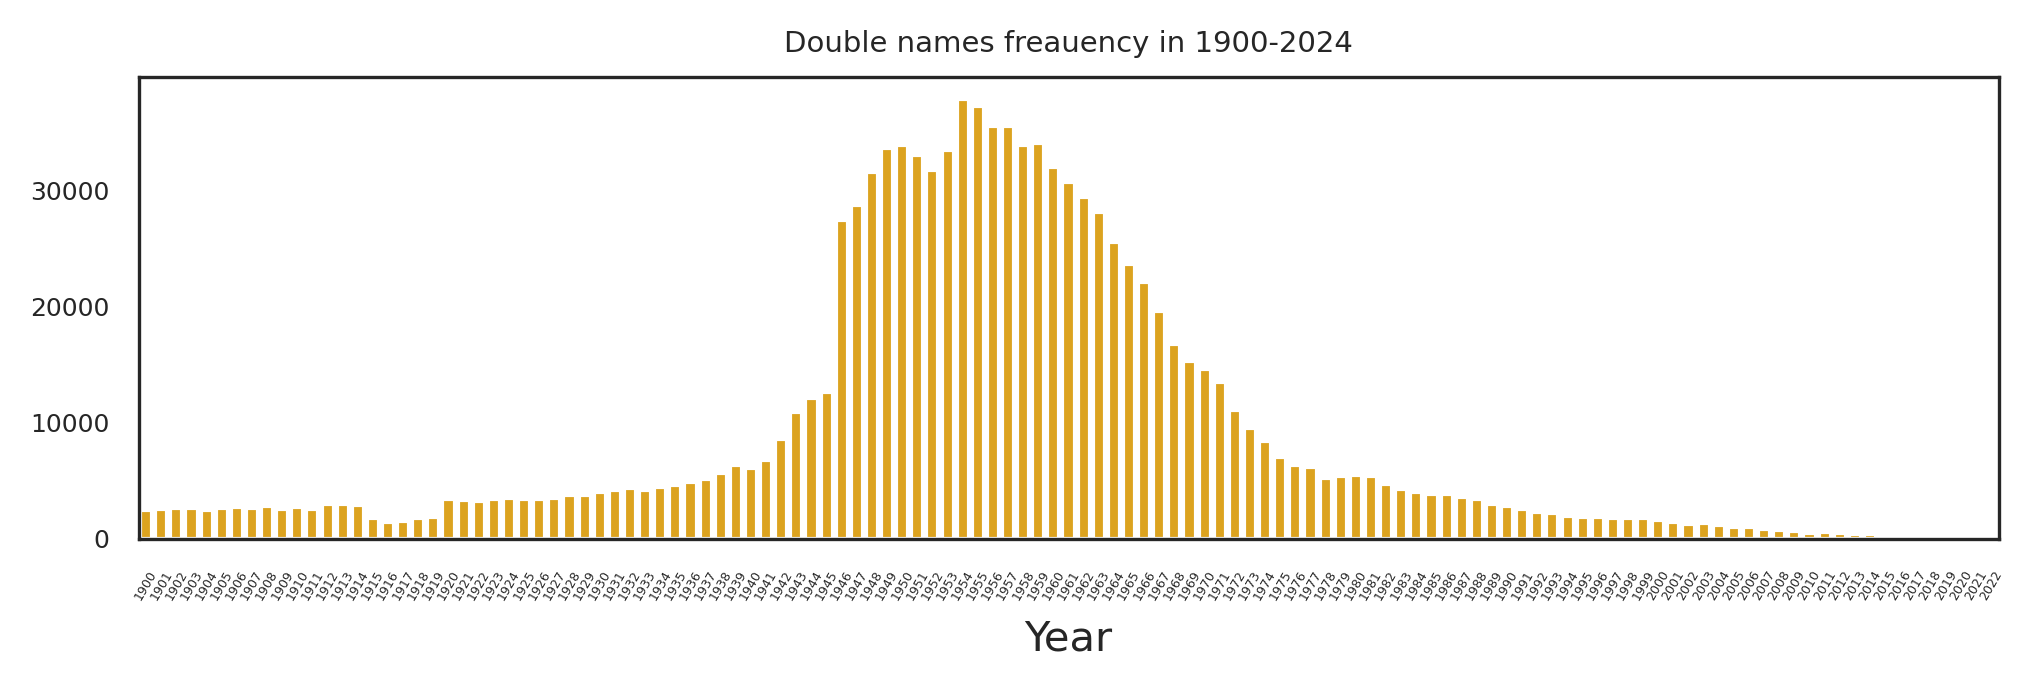

In [98]:
fig = plt.figure(figsize=[8,2])

# palette = sns.color_palette(cc.glasbey, n_colors=15)

ax = sns.barplot(data = double_names,
            x= 'year',
            y= 'count',
            errorbar=None, color = '#FBAF00')

plt.ylabel('')
# plt.ylim(0,25)
# ax.set_yscale('log')
# ax.set_yticks([0,2000,8000,12000])
plt.yticks(fontsize= 6)
plt.xticks(fontsize = 3, rotation=60)
plt.xlabel('Year')
# plt.ylabel('Proportion to other names')
# plt.xlim(-0.5, 99.5)
plt.title("Double names freauency in 1900-2024",fontsize=7)

# for index, row in popname_girls.iterrows():
    # ax.text(index-0.4, row.iloc[3]+0.5, row.iloc[1], fontsize = 3, rotation = 90)
    

# for bar in ax.containers[2]:
#     bar.set_alpha(0.7)
    
# for bar in ax.containers[0]:
#     bar.set_alpha(0.7)

# chld = plt.gca().get_children()
# plt.legend().remove()

plt.patches = []

In [99]:
norare_rare_count = data_norare.groupby('annais').agg({'nombre': 'sum'}).reset_index()

In [100]:
norare_rare_count['count_rare'] = rarename_girls['count'] + rarename_boys['count']

In [101]:
norare_rare_count

annais  nombre  count_rare
0     1900  412064        2976
1     1901  450340        3116
2     1902  462713        3076
3     1903  465761        3049
4     1904  475720        3242
..     ...     ...         ...
118   2018  691771       52461
119   2019  685185       54010
120   2020  666844       54303
121   2021  673631       54722
122   2022  655781       56692

[123 rows x 3 columns]

In [102]:
((data_norare.groupby(['annais','preusuel'])
 .agg({'nombre': 'sum'}).xs('1900')
 .sort_values(by = 'nombre',ascending=False)
 .reset_index()['nombre'].cumsum()) 
 <= (data_norare.groupby(['annais','preusuel'])
 .agg({'nombre': 'sum'}).xs('1900')
 .sort_values(by = 'nombre',ascending=False)
 .reset_index()['nombre'].sum() / 2)).sum()+1

27

In [103]:
suffisent = pd.DataFrame()
suffisent['year'] = range(1900,2023)
suffisent['count'] = [((data_norare.groupby(['annais','preusuel'])
                     .agg({'nombre': 'sum'}).xs(str(year))
                     .sort_values(by = 'nombre',ascending=False)
                     .reset_index()['nombre'].cumsum()) 
                     <= (data_norare.groupby(['annais','preusuel'])
                     .agg({'nombre': 'sum'}).xs(str(year))
                     .sort_values(by = 'nombre',ascending=False)
                     .reset_index()['nombre'].sum() / 2)).sum()+1 for year in range(1900,2023)]

/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/dmitrii.druzhbin@Digital-Grenoble.local/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


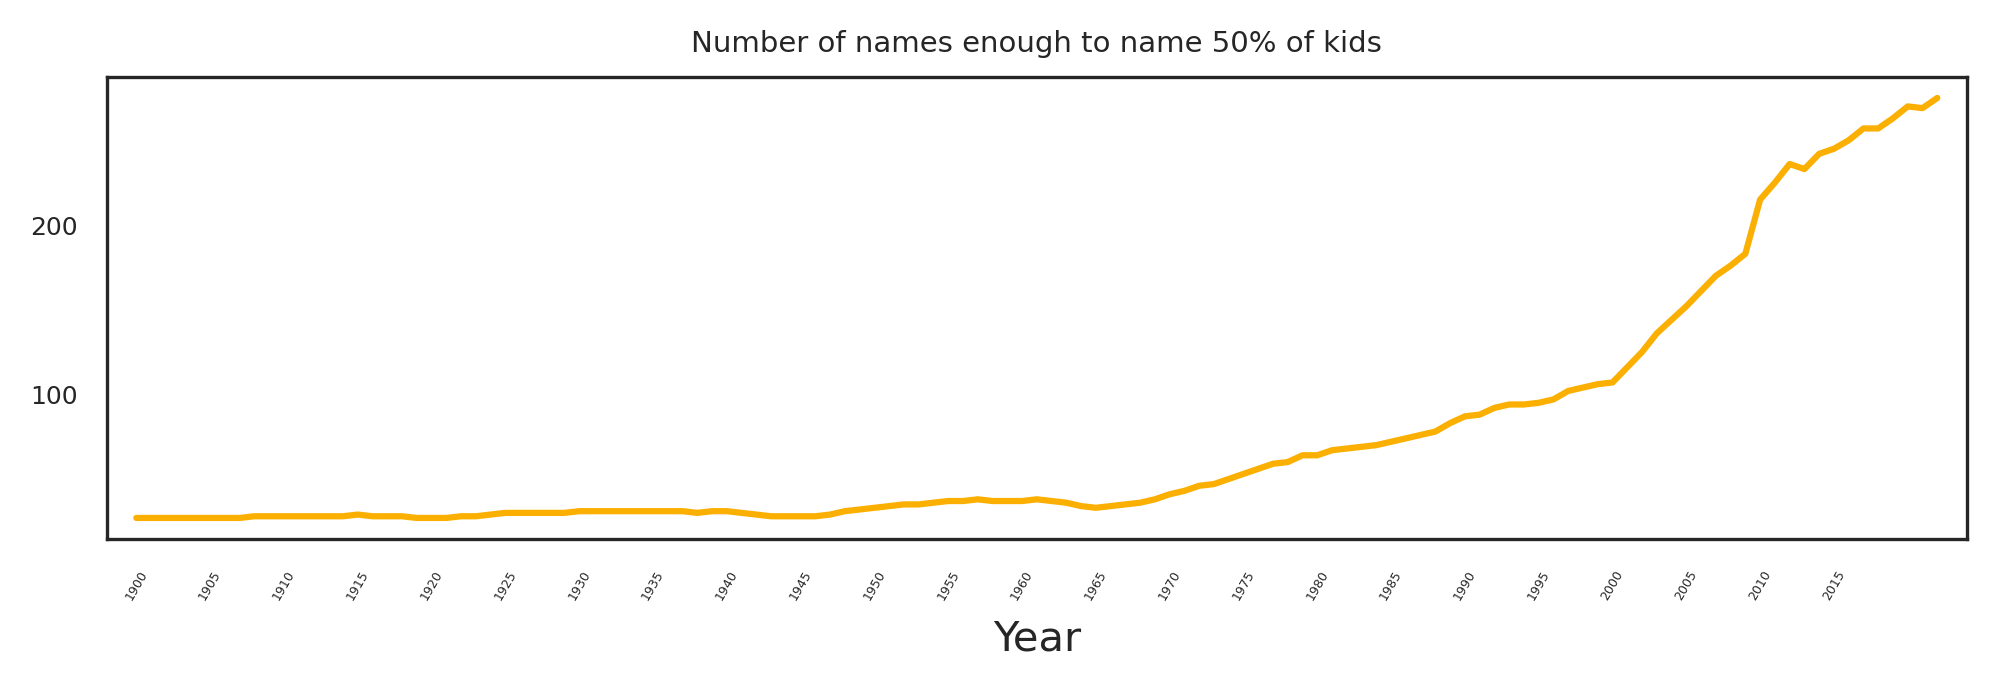

In [104]:
fig = plt.figure(figsize=[8,2])

ax = sns.lineplot(data = suffisent,
            x= 'year',
            y= 'count',
            errorbar=None, color = '#FBAF00')

plt.ylabel('')
plt.yticks(fontsize= 6)
plt.xticks(fontsize = 3, rotation=60)
plt.xlim(1898,2024)
plt.xticks(range(1900,2020,5))
plt.xlabel('Year')
plt.title("Number of names enough to name 50% of kids",fontsize=7)
plt.patches = []

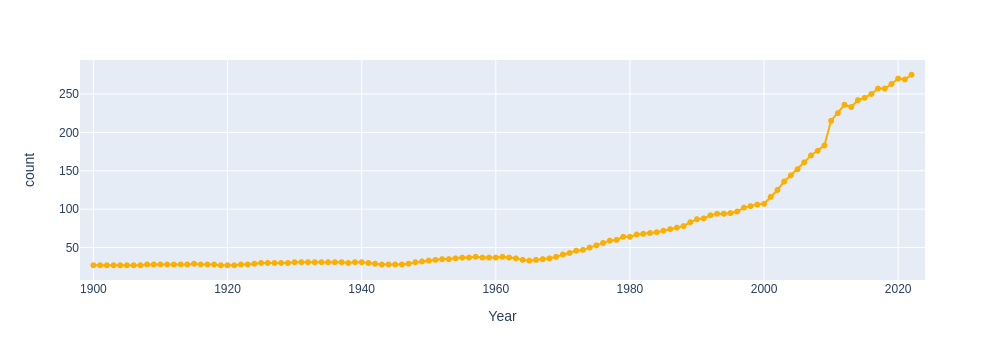

In [106]:
fig = px.line(data_frame=suffisent,
                x = 'year',
                y = 'count',
                markers=True,
                range_x = [1898,2024],
                labels={'year': 'Year', 'count': 'count'},
                hover_data=['count'])

fig.update_traces(line=dict(color="#FBAF00"))

fig.show()

## À l’échelle régionale, le prénom Loïc, très populaire entre 1975 et 2000,
constitue un bon exemple de cette circulation des prénoms. Cantonné à la
Bretagne jusque dans les années 1980, il a essaimé en France jusqu’à être
davantage donné dans d’autres régions, s’effaçant en Bretagne.
## Qu’en pensez vous?

In [121]:
count_name_year('LOÏC', '2020')

0.018581509733799073

In [123]:
data_loÏc = pd.DataFrame()

In [129]:
data_loÏc['year'] = range(1900,2023)
data_loÏc['proportion'] = [count_name_year('LOÏC', str(year)) for year in range(1900,2023)]

In [131]:
data_loÏc

year  proportion
0    1900    0.000000
1    1901    0.000000
2    1902    0.000000
3    1903    0.000000
4    1904    0.000000
..    ...         ...
118  2018    0.024052
119  2019    0.021510
120  2020    0.018582
121  2021    0.017025
122  2022    0.015720

[123 rows x 2 columns]

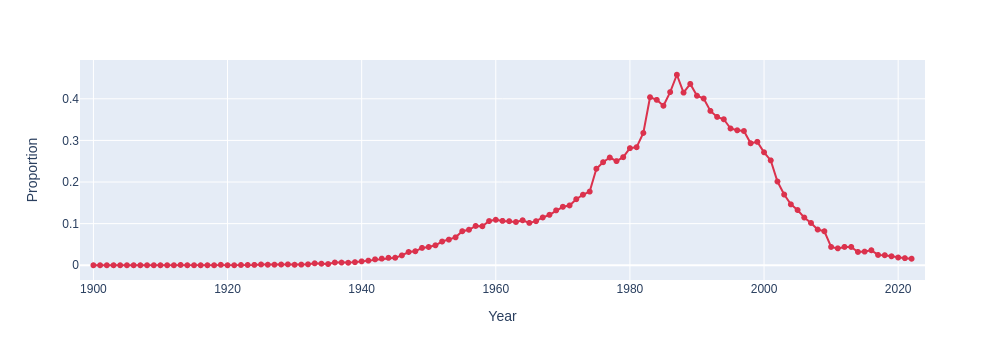

In [139]:
fig = px.line(data_frame=data_loÏc,
                x = 'year',
                y = 'proportion',
                markers=True,
                range_x = [1898,2024],
                labels={'year': 'Year', 'proportion': 'Proportion'},
                hover_data=['proportion'])

fig.update_traces(line=dict(color="#DB324D"))

fig.show()

In [145]:
data_dpt = pd.read_csv(path+'/data/dpt2022.csv',sep=';')

In [860]:
data_dpt.head()

sex            name  year dpt  count
0    1  _prenoms_rares  1900  02      7
1    1  _prenoms_rares  1900  04      9
2    1  _prenoms_rares  1900  05      8
3    1  _prenoms_rares  1900  06     23
4    1  _prenoms_rares  1900  07      9

In [151]:
data_dpt = data_dpt.rename(columns={'sexe': 'sex', 'preusuel': 'name', 'annais': 'year', 'nombre': 'count'})

In [173]:
data_dpt.year = data_dpt.year.map(lambda x: remove_XXXX(str(x)))

/tmp/ipykernel_4925/2778752458.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [175]:
data_dpt = data_dpt.dropna()

In [187]:
data_dpt.name = data_dpt.name.str.lower()

/tmp/ipykernel_4925/2643856358.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [862]:
data_dpt

sex            name  year  dpt  count
0          1  _prenoms_rares  1900   02      7
1          1  _prenoms_rares  1900   04      9
2          1  _prenoms_rares  1900   05      8
3          1  _prenoms_rares  1900   06     23
4          1  _prenoms_rares  1900   07      9
...      ...             ...   ...  ...    ...
3835759    2             zya  2013   59      3
3835760    2             zya  2017  974      3
3835761    2             zya  2018   59      3
3835762    2             zya  2021   35      5
3835764    2            zyna  2013   93      3

[3796434 rows x 5 columns]

In [223]:
data_dpt_loic = data_dpt.groupby(['dpt','year','name']).agg({'count':'sum'}).xs('loïc', level = 2)

In [1008]:
def fill_dpt(dataframe):
    for i in range(1,97):
        if len(str(i)) == 1:
            if '0'+str(i) not in list(dataframe['dpt']):
                dataframe.loc[len(dataframe.index)] = ['0'+str(i), 0]
        elif str(i) not in list(dataframe['dpt']):
            dataframe.loc[len(dataframe.index)] = [str(i), 0]
    return dataframe

In [832]:
year_loic = 1929
df_test = data_dpt_loic.xs(str(year_loic),level=1).reset_index()

In [963]:
df_test = fill_dpt(df_test)

In [251]:
df_dpt_loic = data_dpt_loic.reset_index()

In [219]:
# import plotly.graph_objs as go
# from plotly.offline import init_notebook_mode,iplot
# init_notebook_mode(connected=True)

In [ ]:
# to_plot = dict(type = 'choropleth',
#               locations = data_dpt_loic.reset_index()['dpt'],
#               locationmode = '',
#               colorscale = ''.
#               text = ,
#               z = data[],
#               colorbar = {'title': 'colobar Title'})

# layout = dict(
#     title = '',
#     geo = dict(
#     showframe = False,
#     projection = {'type': 'natural earth'}
#     )
# )

# choromap = go.Figure(data = [to_plot], layout= layout)
# iplot(choromap)

In [473]:
import pandas_geojson as pdg
import geojson

with open(path+'/data/departements-version-simplifiee.geojson') as file:
    geojson_fr = geojson.load(file)

In [804]:
with open(path+'/data/departements-version-simplifiee.geojson') as file:
    dep_name = geojson.load(file)

In [806]:
df_dep_name = pd.DataFrame()
df_dep_name['dpt'] = []
df_dep_name['dpt_name'] = []

In [808]:
df_dep_name

Empty DataFrame
Columns: [dpt, dpt_name]
Index: []

In [810]:
for i in range(len(dep_name['features'])):
    df_dep_name.loc[i] = dep_name['features'][i]['properties'].values()

In [812]:
df_dep_name

dpt                 dpt_name
0   01                      Ain
1   02                    Aisne
2   03                   Allier
3   04  Alpes-de-Haute-Provence
4   05             Hautes-Alpes
..  ..                      ...
91  91                  Essonne
92  92           Hauts-de-Seine
93  93        Seine-Saint-Denis
94  94             Val-de-Marne
95  95               Val-d'Oise

[96 rows x 2 columns]

In [521]:
print(len(geojson_fr['features']))

96


In [479]:
for i in range(len(geojson_fr["features"])):
    geojson_fr["features"][i]['properties'] = {'dpt': str(geojson_fr["features"][i]['properties']['code'])}

KeyError: 'code'

In [483]:
geojson_fr['features'][0]['properties']

{'dpt': '01'}

In [929]:
df_test_names = df_test.merge(df_dep_name, on = 'dpt')
df_test_names

dpt  count                 dpt_name
0   22      4            Côtes-d'Armor
1   01      0                      Ain
2   02      0                    Aisne
3   03      0                   Allier
4   04      0  Alpes-de-Haute-Provence
..  ..    ...                      ...
89  91      0                  Essonne
90  92      0           Hauts-de-Seine
91  93      0        Seine-Saint-Denis
92  94      0             Val-de-Marne
93  95      0               Val-d'Oise

[94 rows x 3 columns]

In [1010]:
df_dep_name

dpt                 dpt_name
0   01                      Ain
1   02                    Aisne
2   03                   Allier
3   04  Alpes-de-Haute-Provence
4   05             Hautes-Alpes
..  ..                      ...
91  91                  Essonne
92  92           Hauts-de-Seine
93  93        Seine-Saint-Denis
94  94             Val-de-Marne
95  95               Val-d'Oise

[96 rows x 2 columns]

In [967]:
empty_df = df_dep_name.copy()
empty_df['count'] = [0 for i in range(1,97)]
empty_df

dpt                 dpt_name  count
0   01                      Ain      0
1   02                    Aisne      0
2   03                   Allier      0
3   04  Alpes-de-Haute-Provence      0
4   05             Hautes-Alpes      0
..  ..                      ...    ...
91  91                  Essonne      0
92  92           Hauts-de-Seine      0
93  93        Seine-Saint-Denis      0
94  94             Val-de-Marne      0
95  95               Val-d'Oise      0

[96 rows x 3 columns]

In [1016]:
def check_data_name_year(name,year):
    dataframe = data_dpt.groupby(['dpt','year','name']).agg({'count':'sum'})
    if name in list(dataframe.reset_index()['name']):
        dataframe = dataframe.xs(name, level = 2)
        if str(year) in list(dataframe.reset_index()['year']):
            return fill_dpt(dataframe.xs(str(year),level=1).reset_index()).merge(df_dep_name, on = 'dpt')
        else: return empty_df
    else: return empty_df

In [1018]:
t = check_data_name_year('zyna',2013)
print(t)

   dpt  count                 dpt_name
0   93      3        Seine-Saint-Denis
1   01      0                      Ain
2   02      0                    Aisne
3   03      0                   Allier
4   04      0  Alpes-de-Haute-Provence
..  ..    ...                      ...
89  90      0    Territoire de Belfort
90  91      0                  Essonne
91  92      0           Hauts-de-Seine
92  94      0             Val-de-Marne
93  95      0               Val-d'Oise

[94 rows x 3 columns]


In [988]:
data_fig = data_dpt.groupby(['dpt','year','name']).agg({'count':'sum'}).reset_index()
data_fig

dpt  year            name  count
0         01  1900  _prenoms_rares      4
1         01  1900          adrien      8
2         01  1900        adrienne      9
3         01  1900           adèle      5
4         01  1900            aime     10
...      ...   ...             ...    ...
3753778  976  2022         zaïnaba      3
3753779  976  2022        zaïnabou      3
3753780  976  2022           ziyad      6
3753781  976  2022           zohra      8
3753782  976  2022        zoulayha      3

[3753783 rows x 4 columns]

In [931]:
data_fig = data_dpt.groupby(['dpt','year','name']).agg({'count':'sum'}).xs('zyna', level = 2)
data_fig

count
dpt year       
93  2013      3

In [935]:
data_fig = fill_dpt(data_dpt.groupby(['dpt','year','name']).agg({'count':'sum'}).xs('zyna', level = 2).xs(str(2013),level=1).reset_index()).merge(df_dep_name, on = 'dpt')

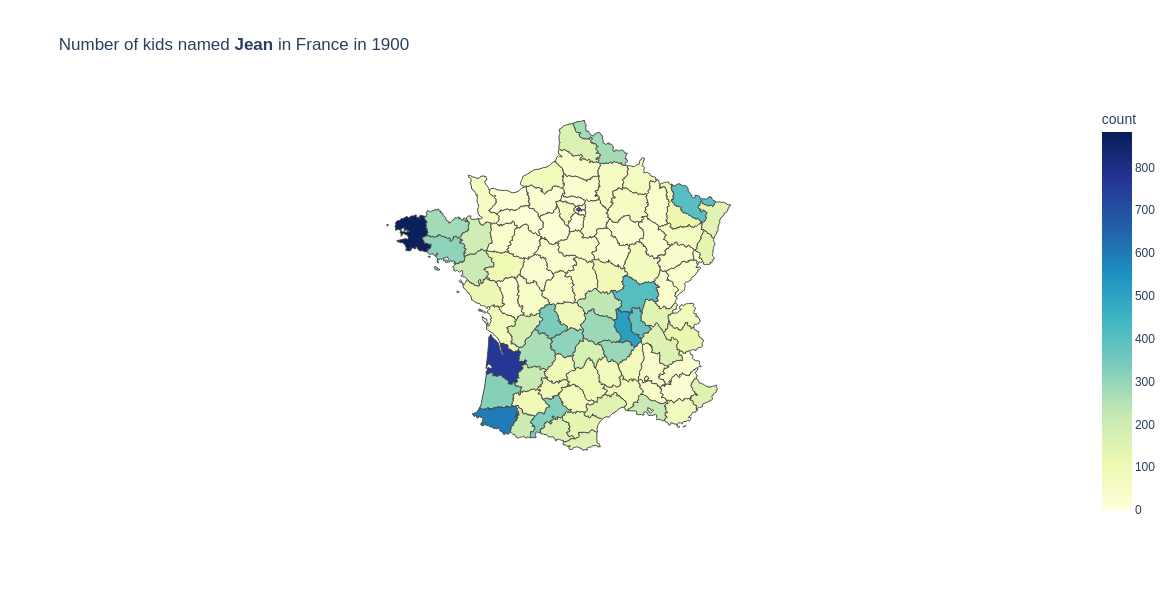

In [1083]:
year_loic = 1900
name_loic = 'jean'
data_fig = check_data_name_year(name_loic,year_loic )
fig = px.choropleth(data_fig, 
                    geojson=geojson_fr, 
                    locations = 'dpt', 
                    featureidkey="properties.dpt",
                    projection="mercator", 
                    color = 'count',
                    color_continuous_scale ='ylgnbu',
                    range_color=(0,data_fig['count'].max()+10),
                    width = 600,
                    height = 600,
                    hover_name = 'dpt_name',
                    hover_data = {'dpt': False},
                    title = ('Number of kids named '+f'<b>{str(name_loic.capitalize())}</b>'+' in France in '+str(year_loic))
                   )

fig.update_geos(fitbounds="geojson", visible=False)
fig.show()

In [1085]:
from dash import Dash, dcc, html, Input, Output

In [1213]:
app = Dash(__name__)

colors = {
    'background': '#FFFFFF',
    'text': '#7FDBFF'
}

app.layout = html.Div(style={'backgroundColor': colors['background']},
                      children = [html.H4(('Number of kids named '+f'{str(name_loic.capitalize())}'+' in France in '+str(year_loic)),
                                         style={'textAlign': 'center'}),
                                  html.I("input name"),
                                  html.Br(style={'display': 'inline-block','verticalAlign': 'middle'}),
                                  dcc.Input(
                                  ),
                                  dcc.Slider(1900, 2022, 1,marks=None,tooltip={"placement": "bottom", "always_visible": True},id='slider'),
                                  html.Div(id='slider-output-container'),
                                  dcc.Graph(id="graph")
                                  
    
])

# @app.callback(
#     Output("graph", "figure"), 
#     Input("slider", "value"))


# def display_choropleth(slider):
#     data_fig = check_data_name_year(name_loic,slider) # replace with your own data source
# #     geojson = px.data.election_geojson()
#     fig = px.choropleth(
#         df, geojson=geojson, color=candidate,
#         locations="district", featureidkey="properties.district",
#         projection="mercator", range_color=[0, 6500])
#     fig.update_geos(fitbounds="locations", visible=False)
#     fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
#     return fig

In [1215]:
app.run_server(debug=True)